In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import DataLoader

## Dataset

In [2]:
d1 = pd.read_csv('C:/Users/91738/RAID OSR Project/GOQii Dataset/User Data/User5043629.csv')
d2 = pd.read_csv('C:/Users/91738/RAID OSR Project/GOQii Dataset/User Data/User4991517.csv')
d3 = pd.read_csv('C:/Users/91738/RAID OSR Project/GOQii Dataset/User Data/User4978354.csv')
d4 = pd.read_csv('C:/Users/91738/RAID OSR Project/GOQii Dataset/User Data/User4972456.csv')
d5 = pd.read_csv('C:/Users/91738/RAID OSR Project/GOQii Dataset/User Data/User4972164.csv')
d6 = pd.read_csv('C:/Users/91738/RAID OSR Project/GOQii Dataset/User Data/User4949816.csv')
d7 = pd.read_csv('C:/Users/91738/RAID OSR Project/GOQii Dataset/User Data/User4724262.csv')
d8 = pd.read_csv('C:/Users/91738/RAID OSR Project/GOQii Dataset/User Data/User774950.csv')
d9 = pd.read_csv('C:/Users/91738/RAID OSR Project/GOQii Dataset/User Data/User135966.csv')
d10 = pd.read_csv('C:/Users/91738/RAID OSR Project/GOQii Dataset/User Data/User555.csv')

d7["Date"] = d6["Date"]
cols = ["Date","Steps","deepSleep","lightSleep","remSleep","awakeSleep","sleepTime","sleepMinHR","sleepMaxHR","restingHR","minSpo2","maxSpo2","sleep_score"]
d7 = d7[cols]

datasets = [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10]

## RNN Model

In [3]:
class RNNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()        # initialise object of parent class RNNModel
        
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')

        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        out, hn = self.rnn(x)
        out = self.fc(out) 
        return out
    

input_dim = 11    # input dimension
hidden_dim = 33  # hidden layer dimension
layer_dim = 1     # number of hidden layers
output_dim = 1   # output dimension
seq_dim = 1

model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Training 

In [4]:
losses = []
epochs = []

In [8]:
max_epochs = 500

for epoch in range(max_epochs):
    
    epochs.append(epoch)
    avg_loss = 0
    for person in range(10):
        
        X = (datasets[person].iloc[:,1:-1]).to_numpy()
        Y = (datasets[person].iloc[:,-1]).to_numpy()
        
        X = torch.tensor(X)
        X = X.type(torch.FloatTensor)
        labels = torch.tensor(Y)
        labels = labels.type(torch.FloatTensor)
        
        outputs = model.forward(X).squeeze()
        loss = F.mse_loss(outputs,labels)
        avg_loss += loss.data
        loss.backward()
        optimizer.step()
    
    losses.append(avg_loss/1000)
    
    if(epoch%5 == 0):
        print("Epoch",epoch,"/",max_epochs," Loss=",avg_loss)

Epoch 0 / 500  Loss= tensor(10316.8535)
Epoch 5 / 500  Loss= tensor(8553.6650)
Epoch 10 / 500  Loss= tensor(6919.6987)
Epoch 15 / 500  Loss= tensor(5447.3823)
Epoch 20 / 500  Loss= tensor(4161.6792)
Epoch 25 / 500  Loss= tensor(3080.2664)
Epoch 30 / 500  Loss= tensor(2214.1860)
Epoch 35 / 500  Loss= tensor(1568.6206)
Epoch 40 / 500  Loss= tensor(1143.8138)
Epoch 45 / 500  Loss= tensor(935.9288)
Epoch 50 / 500  Loss= tensor(937.8663)
Epoch 55 / 500  Loss= tensor(1139.9213)
Epoch 60 / 500  Loss= tensor(1530.3530)
Epoch 65 / 500  Loss= tensor(2095.8259)
Epoch 70 / 500  Loss= tensor(2821.7534)
Epoch 75 / 500  Loss= tensor(3692.5610)
Epoch 80 / 500  Loss= tensor(4691.8643)
Epoch 85 / 500  Loss= tensor(5802.5757)
Epoch 90 / 500  Loss= tensor(7007.0151)
Epoch 95 / 500  Loss= tensor(8286.9326)
Epoch 100 / 500  Loss= tensor(9623.5195)
Epoch 105 / 500  Loss= tensor(10997.4492)
Epoch 110 / 500  Loss= tensor(12388.8242)
Epoch 115 / 500  Loss= tensor(13777.1855)
Epoch 120 / 500  Loss= tensor(15141.

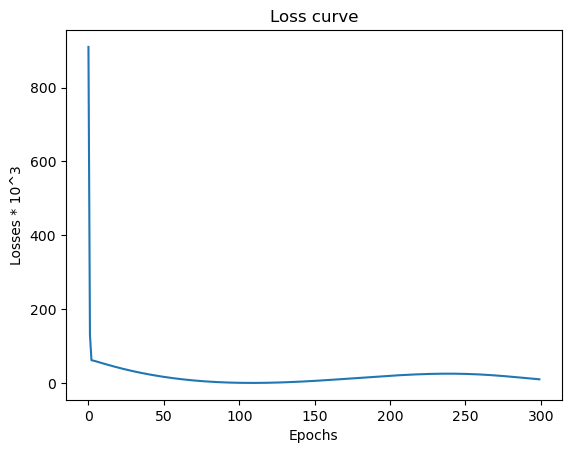

In [6]:
plt.plot(epochs, losses)
plt.xlabel("Epochs")
plt.ylabel("Losses * 10^3")
plt.title("Loss curve")
plt.show()

## Model Summary

In [7]:
from torchinfo import summary

summary(model, input_data = X)

Layer (type:depth-idx)                   Output Shape              Param #
RNNModel                                 [29, 1]                   --
├─RNN: 1-1                               [29, 33]                  1,518
├─Linear: 1-2                            [29, 1]                   34
Total params: 1,552
Trainable params: 1,552
Non-trainable params: 0
Total mult-adds (M): 1.45
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.01
Estimated Total Size (MB): 0.02